In [1]:
#install these first
#conda install -c anaconda graphviz python-graphviz pydotplus six

In [2]:
%matplotlib inline
#https://datascience.stackexchange.com/questions/37428/graphviz-not-working-when-imported-inside-pydotplus-graphvizs-executables-not
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from six import StringIO  
import pydotplus
import graphviz
from IPython.display import Image

import seaborn as sn
sn.set(style='whitegrid')

## Use a Decision Tree for Classification

 ### load the fuit data file
The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### Split the data into a Training data Set and a Testing data Set

In [4]:
features=['width', 'height', 'color_score']
X = fruits[features]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Build and Train a DecisionTreeClassifier

In [5]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = dtree.fit(X_train, Y_train)

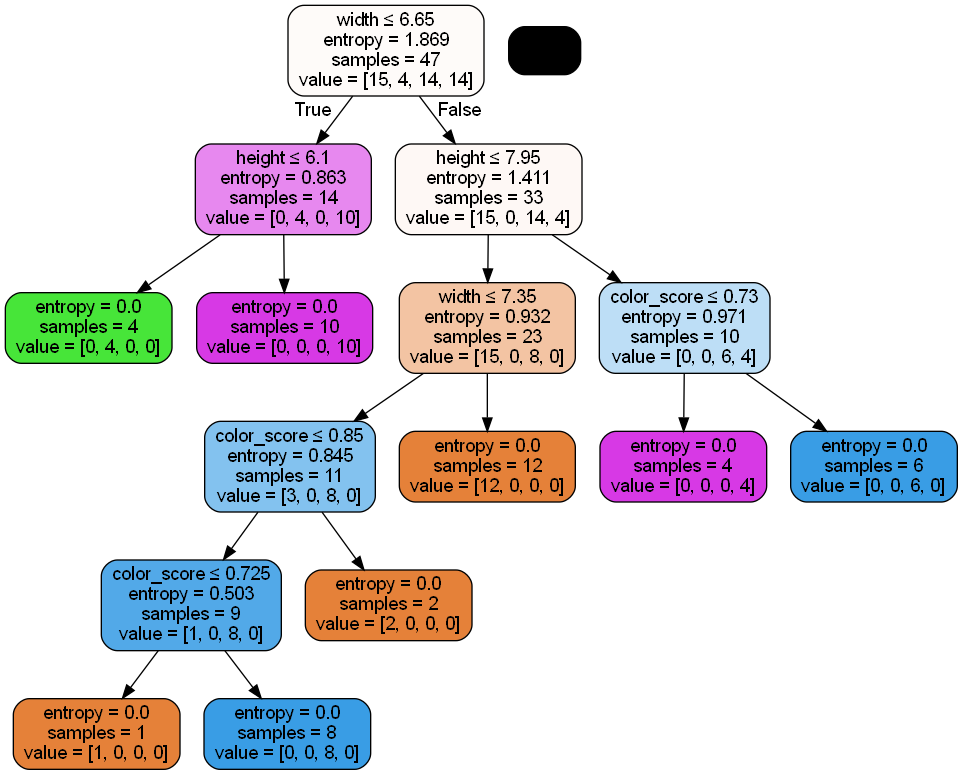

In [6]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

 ### Evaluate Performance of the Classifier on the Training Set and the Testing Set### 

In [7]:
dtree.score(X_train, Y_train)

1.0

In [8]:
dtree.score(X_test, Y_test)

0.8333333333333334

### Let's use two features: width/height, color_score

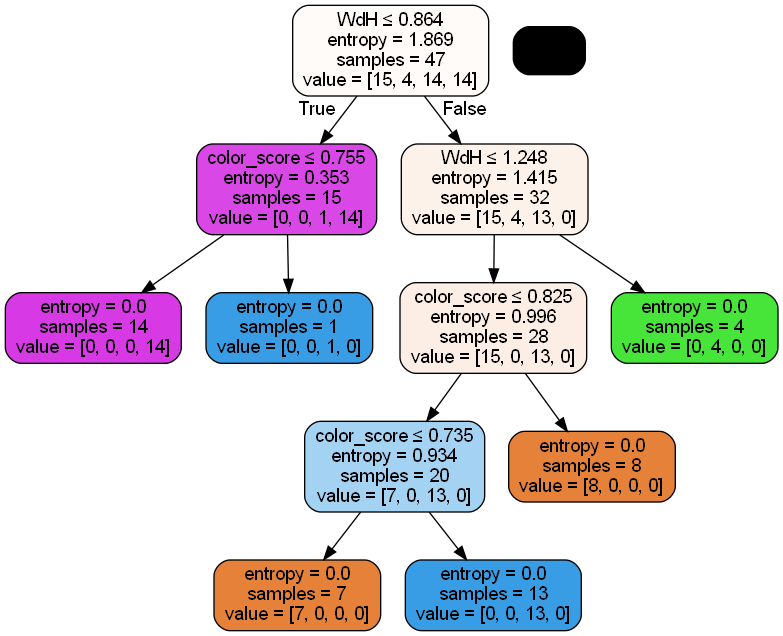

In [9]:
#add a new column named WdH
fruits['WdH']=fruits['width']/fruits['height']
#select the features
features = ['WdH', 'color_score']
#split the data into a training set and a testing set
X = fruits[features]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#
dtree = DecisionTreeClassifier(criterion='entropy')
clf = dtree.fit(X_train, Y_train)
#
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [10]:
dtree.score(X_train, Y_train)

1.0

In [11]:
dtree.score(X_test, Y_test)

0.9166666666666666